In [39]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# 1. 라이브러리 로드
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

torch.manual_seed(0)

# 2. 하이퍼파라미터 설정
seq_length = 7 
data_dim = 5 
hidden_dim = 10 
output_dim = 1 
iteration = 100

# 3. 데이터 로드
xy = pd.read_excel('/content/train_data.xlsx',engine='openpyxl')
xy = xy[::-1] # 데이터를 역순으로 ordering 해줌
xy_2 = pd.read_excel('/content/prediction_data.xlsx',engine='openpyxl')
xy_2 = xy_2[::-1]

In [42]:
from sklearn.preprocessing import MinMaxScaler

xy.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['평균기온(℃)','평균최고기온(℃)','최고기온(℃)','평균최저기온(℃)','최저기온(℃)','강수량','인구','아황산가스','일산화탄소','이산화질소','철새 합계']
xy_scaled = scaler.fit_transform(xy[scale_cols])
xy_scaled = pd.DataFrame(xy_scaled)
xy_scaled.columns = scale_cols

xy_scaled

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량,인구,아황산가스,일산화탄소,이산화질소,철새 합계
0,0.159375,0.139752,0.183007,0.148148,0.157068,0.037573,1.0,0.4,0.600000,0.653846,0.572907
1,0.346875,0.375776,0.392157,0.308642,0.337696,0.135526,1.0,0.4,0.600000,0.615385,0.473029
2,0.612500,0.621118,0.624183,0.577160,0.518325,0.106140,1.0,0.2,0.150562,0.307692,0.541270
3,0.809375,0.791925,0.709150,0.805556,0.746073,0.294444,1.0,0.2,0.150562,0.153846,0.000000
4,0.950000,0.937888,0.908497,0.953704,0.895288,0.171637,1.0,0.2,0.150562,0.038462,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
67,0.681250,0.742236,0.800654,0.626543,0.596859,0.093421,0.0,0.6,0.276404,0.615385,0.000000
68,0.528125,0.577640,0.575163,0.484568,0.476440,0.080702,0.0,0.6,0.375281,0.730769,0.000000
69,0.350000,0.381988,0.522876,0.311728,0.329843,0.015205,0.0,0.8,0.649438,0.961538,0.000000
70,0.178125,0.189441,0.238562,0.169753,0.188482,0.023392,0.0,0.8,0.898876,0.807692,0.000000


In [43]:
from sklearn.preprocessing import MinMaxScaler

xy.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['평균기온(℃)','평균최고기온(℃)','최고기온(℃)','평균최저기온(℃)','최저기온(℃)','강수량','인구','아황산가스','일산화탄소','이산화질소','철새 합계']
xy_scaled = scaler.fit_transform(xy[scale_cols])
xy_scaled = pd.DataFrame(xy_scaled)
xy_scaled.columns = scale_cols

xy_scaled

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량,인구,아황산가스,일산화탄소,이산화질소,철새 합계
0,0.159375,0.139752,0.183007,0.148148,0.157068,0.037573,1.0,0.4,0.600000,0.653846,0.572907
1,0.346875,0.375776,0.392157,0.308642,0.337696,0.135526,1.0,0.4,0.600000,0.615385,0.473029
2,0.612500,0.621118,0.624183,0.577160,0.518325,0.106140,1.0,0.2,0.150562,0.307692,0.541270
3,0.809375,0.791925,0.709150,0.805556,0.746073,0.294444,1.0,0.2,0.150562,0.153846,0.000000
4,0.950000,0.937888,0.908497,0.953704,0.895288,0.171637,1.0,0.2,0.150562,0.038462,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
67,0.681250,0.742236,0.800654,0.626543,0.596859,0.093421,0.0,0.6,0.276404,0.615385,0.000000
68,0.528125,0.577640,0.575163,0.484568,0.476440,0.080702,0.0,0.6,0.375281,0.730769,0.000000
69,0.350000,0.381988,0.522876,0.311728,0.329843,0.015205,0.0,0.8,0.649438,0.961538,0.000000
70,0.178125,0.189441,0.238562,0.169753,0.188482,0.023392,0.0,0.8,0.898876,0.807692,0.000000


In [44]:
xy_2.sort_index(ascending=False).reset_index(drop=True)


scale_cols = ['평균기온(℃)','평균최고기온(℃)','최고기온(℃)','평균최저기온(℃)','최저기온(℃)','강수량','인구','아황산가스','일산화탄소','이산화질소','철새 합계']
xy2_scaled = scaler.fit_transform(xy_2[scale_cols])
xy2_scaled = pd.DataFrame(xy2_scaled)
xy2_scaled.columns = scale_cols

xy2_scaled

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량,인구,아황산가스,일산화탄소,이산화질소,철새 합계
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.894737,0.864710
1,0.298893,0.328185,0.395745,0.260417,0.221574,0.079731,0.0,0.0,0.666667,0.842105,1.000000
2,0.523985,0.594595,0.548936,0.447917,0.431487,0.026883,0.0,0.0,0.666667,0.578947,0.565171
3,0.793358,0.826255,0.778723,0.763889,0.734694,0.242554,0.0,0.0,0.333333,0.105263,0.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000
5,0.892989,0.911197,0.919149,0.875000,0.877551,0.580571,0.0,0.0,0.333333,0.052632,0.000000
6,0.863469,0.934363,0.961702,0.809028,0.746356,0.132122,0.0,0.0,0.333333,0.210526,0.000000
7,0.664207,0.733591,0.778723,0.614583,0.618076,0.142508,0.0,0.0,0.333333,0.263158,0.000000
8,0.402214,0.474903,0.527660,0.336806,0.399417,0.017107,0.0,0.0,0.333333,0.315789,0.000000
9,0.276753,0.347490,0.404255,0.204861,0.256560,0.022759,0.0,0.0,0.666667,0.631579,0.403503


In [45]:

#train_size = int(len(xy) * 0.7) 
train_set = xy_scaled # train set
test_set = xy2_scaled # test set


In [46]:
test_set

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량,인구,아황산가스,일산화탄소,이산화질소,철새 합계
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.894737,0.864710
1,0.298893,0.328185,0.395745,0.260417,0.221574,0.079731,0.0,0.0,0.666667,0.842105,1.000000
2,0.523985,0.594595,0.548936,0.447917,0.431487,0.026883,0.0,0.0,0.666667,0.578947,0.565171
3,0.793358,0.826255,0.778723,0.763889,0.734694,0.242554,0.0,0.0,0.333333,0.105263,0.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000
5,0.892989,0.911197,0.919149,0.875000,0.877551,0.580571,0.0,0.0,0.333333,0.052632,0.000000
6,0.863469,0.934363,0.961702,0.809028,0.746356,0.132122,0.0,0.0,0.333333,0.210526,0.000000
7,0.664207,0.733591,0.778723,0.614583,0.618076,0.142508,0.0,0.0,0.333333,0.263158,0.000000
8,0.402214,0.474903,0.527660,0.336806,0.399417,0.017107,0.0,0.0,0.333333,0.315789,0.000000
9,0.276753,0.347490,0.404255,0.204861,0.256560,0.022759,0.0,0.0,0.666667,0.631579,0.403503


In [47]:
len(train_set)

72

In [48]:
def build_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [49]:
from sklearn.model_selection import train_test_split

feature_cols = ['강수량','인구','아황산가스','일산화탄소','이산화질소']
label_cols = ['철새 합계']

train_feature = train_set[feature_cols]
train_label = train_set[label_cols]

test_feature = test_set[feature_cols]
test_label = test_set[label_cols]

trainX, trainY = build_dataset(train_feature,train_label ,seq_length) 

x_train, x_valid, y_train, y_valid = train_test_split(trainX, trainY, test_size=0.2)
x_train.shape, x_valid.shape

((52, 7, 5), (13, 7, 5))

In [50]:
test_feature = test_set[feature_cols]
test_label = test_set[label_cols]

test_feature.shape, test_label.shape

((12, 5), (12, 1))

In [51]:
test_feature, test_label = build_dataset(test_feature, test_label, seq_length)
test_feature.shape, test_label.shape

((5, 7, 5), (5, 1))

In [52]:
train_feature=np.array(train_feature)
train_label=np.array(train_label)
test_feature=np.array(test_feature)
test_label = np.array(test_label)

In [53]:
trainX_tensor = torch.FloatTensor(train_feature)
trainY_tensor = torch.FloatTensor(train_label)
testX_tensor = torch.FloatTensor(test_feature)
textY_tensor = torch.FloatTensor(test_label)

In [54]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:,-1])

        
        return x


net = Net(data_dim, 72, output_dim, 1)

In [55]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.3)

In [56]:
# start training
for i in range(iteration):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([72, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 0.08140876889228821
1 51.59299850463867
2 0.17569144070148468
3 0.2924721837043762
4 0.40989986062049866
5 0.08229898661375046
6 0.057974617928266525
7 0.39822912216186523
8 0.05105824023485184
9 0.05310405045747757
10 0.14455127716064453
11 0.3603418171405792
12 0.16053356230258942
13 0.13754615187644958
14 0.06934555619955063
15 0.5998867154121399
16 0.14065484702587128
17 0.05138071998953819
18 0.06809976696968079
19 0.1668321043252945
20 0.14822909235954285
21 0.5234667062759399
22 0.05469314381480217
23 0.056047361344099045
24 0.07517591118812561
25 0.08749178797006607
26 0.07304702699184418
27 0.08668997883796692
28 0.1198924258351326
29 0.06995222717523575
30 0.1082104966044426
31 1.1610301733016968
32 0.669903039932251
33 1.1050209999084473
34 0.9375975131988525
35 0.12396865338087082
36 0.05270145833492279
37 0.1123717874288559
38 0.14508411288261414
39 0.1839289516210556
40 0.08552733063697815
41 0.058191101998090744
42 0.06465461105108261
43 0.060925815254449844
44 0.05400

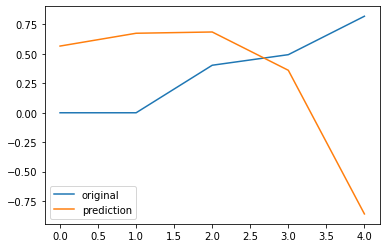

In [57]:
plt.plot(test_label)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()